In [55]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

In [57]:
data1 = sio.loadmat('./data/ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [59]:
X=data1['X']
X.shape

(300, 2)

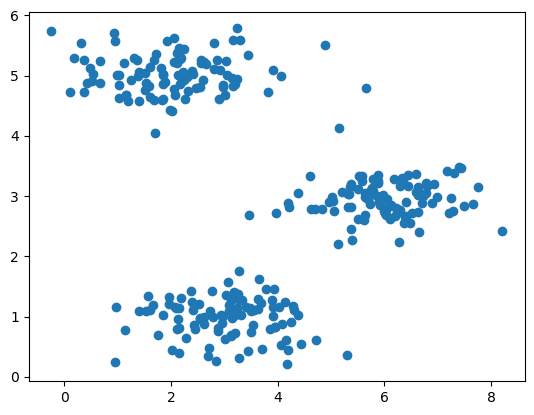

In [61]:
plt.scatter(X[:,0],X[:,1])
plt.show()

# 1. 获取每个样本所属的类别

In [64]:
def find_centroids(X,cen):
    idx=[]
    for i in range(len(X)):
        #(1,2)-(k,2)->(k,2)
        dist=np.linalg.norm((X[i]-cen),axis=1)#l2 norm
        id_i=np.argmin(dist)
        idx.append(id_i)
    return np.array(idx)
        

In [66]:
cen=np.array([[3,3],[6,2],[8,5]])
idx=find_centroids(X,cen)
idx[:3]

array([0, 2, 1], dtype=int64)

# 2. 计算聚类中心

In [73]:
def compute_cen(X,idx,k):
    centroids=[]
    for i in range(k):
        centroid_i=np.mean(X[idx==i],axis=0)
        centroids.append(centroid_i)
    return np.array(centroids)

In [75]:
compute_cen(X,idx,k=3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

# 3. 重复执行1,2

In [78]:
def run_kmeans(X,centros,iters):
    k=len(centros)
    centros_all=[]
    centros_all.append(centros)
    centros_i=centros
    for i in range(iters):
        idx=find_centroids(X,centros_i)
        centros_i=compute_cen(X,idx,k)
        centros_all.append(centros_i)
    return idx,np.array(centros_all)

In [84]:
def plot_data(X,centros_all,idx):
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
    plt.plot(centros_all[:,:,0],centros_all[:,:,1],'kx--')

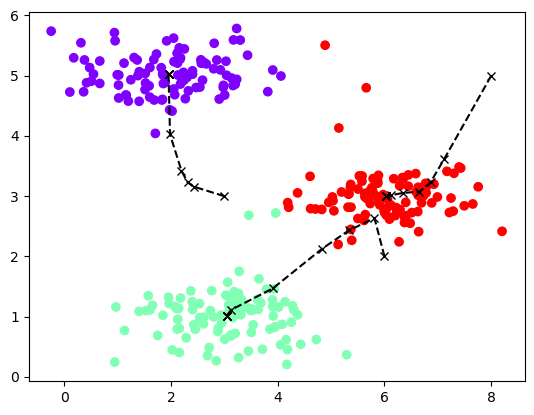

In [86]:
idx,cen_all=run_kmeans(X,cen,iters=10)
plot_data(X,cen_all,idx)

# 观察初识聚类点的位置对聚类效果的影响

In [93]:
def init_centrods(X,k):
    index=np.random.choice(len(X),k)#所有样本点里随机取k个作为cen
    return X[index]

In [95]:
init_centrods(X,k=3)

array([[1.59141937, 4.83212573],
       [2.90401653, 4.61220411],
       [2.32558253, 4.74867962]])

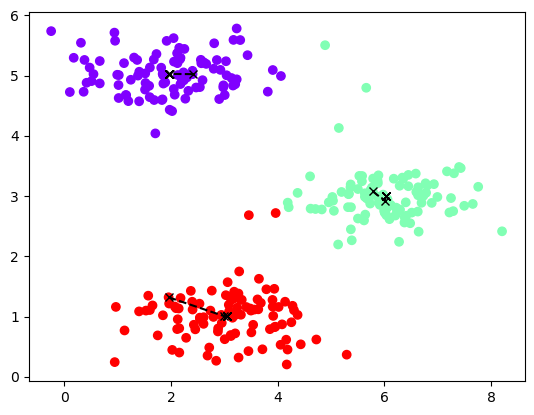

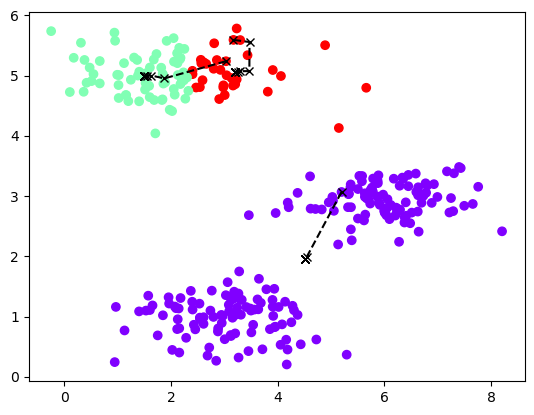

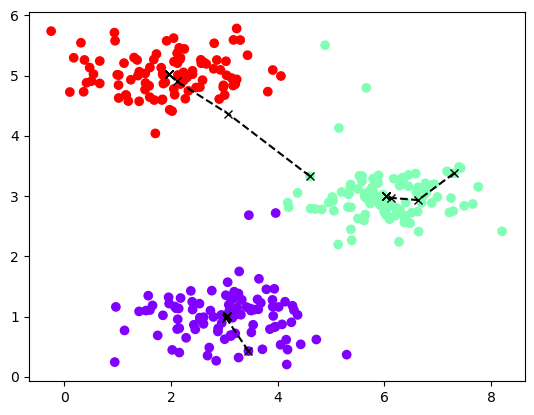

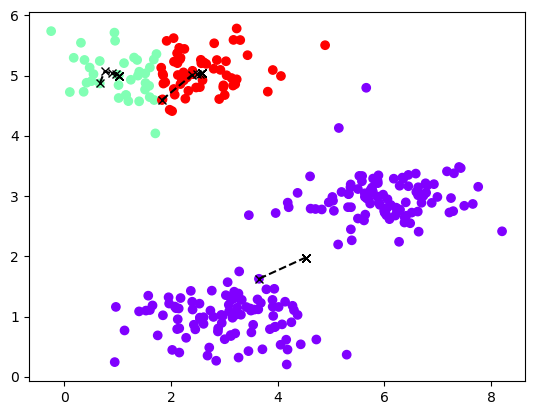

In [99]:
for i in range(4):
    idx,cen=run_kmeans(X,init_centrods(X,k=3),iters=10)
    plot_data(X,cen,idx)

# 案例2使用Kmeans对图片颜色进行聚类

In [102]:
data=sio.loadmat('data/bird_small.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [104]:
A=data['A']
A.shape

(128, 128, 3)

In [106]:
from skimage import io

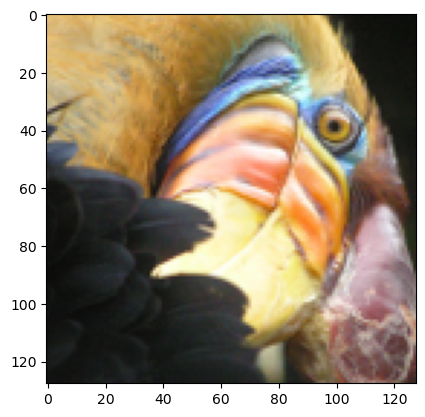

In [110]:
image=io.imread('data/bird_small.png')
plt.imshow(image)

In [114]:
A=A/255
A=A.reshape(-1,3)
A.shape

(16384, 3)

In [ ]:
k=16
idx,centroids_all=run_kmeans(A,init_centrods(X,k=16),iters=20)
centros=centroids_all[-1]
im=np.zeros(A.shape)
for i in range(k):
    im[idx==i] = centros[i]
im=im.reshape(128,128,3)
plt.imshow(im)